In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
auto=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None,na_values="?")

In [3]:
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
auto.columns=["symbol","nor_loss","make","f_type","aspr","no_doors","b_style","wheel","eng_loc","w_base","len","wid","ht","c_wht","e_type","n_cylin","e_size","fuel_sys","bore","stroke","cmp","hpow","rmp","c_mpg","h_mpg","price"]

<h2>PERFORMING EDA</h2>

<h3> CHECKING FOR NULL VALUES </h3>

In [5]:
auto.isnull().sum()

symbol       0
nor_loss    41
make         0
f_type       0
aspr         0
no_doors     2
b_style      0
wheel        0
eng_loc      0
w_base       0
len          0
wid          0
ht           0
c_wht        0
e_type       0
n_cylin      0
e_size       0
fuel_sys     0
bore         4
stroke       4
cmp          0
hpow         2
rmp          2
c_mpg        0
h_mpg        0
price        4
dtype: int64

<h2> COLUMN 1- SYMBOLING (Discrete) </h2>

In [6]:
auto.symbol.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symbol, dtype: float64

In [7]:
auto.symbol.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symbol, dtype: int64

<AxesSubplot:xlabel='symbol', ylabel='count'>

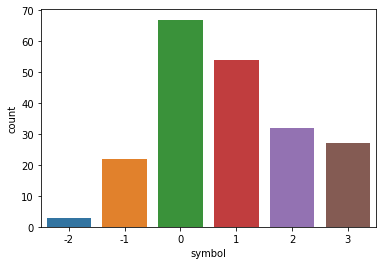

In [8]:
sns.countplot(x="symbol",data=auto)

In [9]:
auto.symbol=auto.symbol.replace([-1,-2,-3],">=-1")

<AxesSubplot:xlabel='symbol', ylabel='count'>

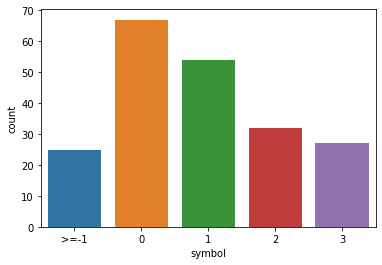

In [10]:
sns.countplot(x="symbol",data=auto,order=[">=-1",0,1,2,3])

<h2>COLUMN 2- NORMALISED LOSSES (continuous)</h2>

In [11]:
auto.nor_loss.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: nor_loss, dtype: float64

<AxesSubplot:>

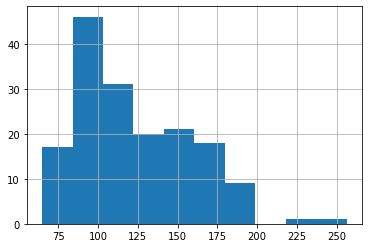

In [12]:
auto.nor_loss.hist()

<h3> -------------------------------------------------------<br>* Normalized losses has 41 null attributes.<br>* Filling the null values with their median</h3>
<br><h3>Normalized losses is not normally distributed and it has outliers </h3>

In [13]:
auto.nor_loss.fillna(auto.nor_loss.median(),inplace=True)

In [14]:
stats.shapiro(auto.nor_loss)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc772b310>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc772b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc674ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc77380d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7738460>],
 'means': []}

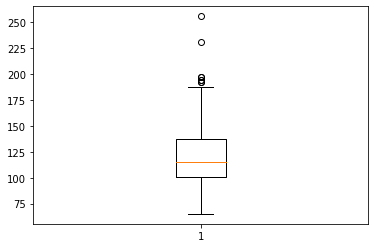

In [15]:
plt.boxplot(auto.nor_loss)

<h1>COLUMN 3- MANUFACTURER (Discrete)</h1>

In [16]:
auto.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [17]:
auto.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='make', ylabel='count'>

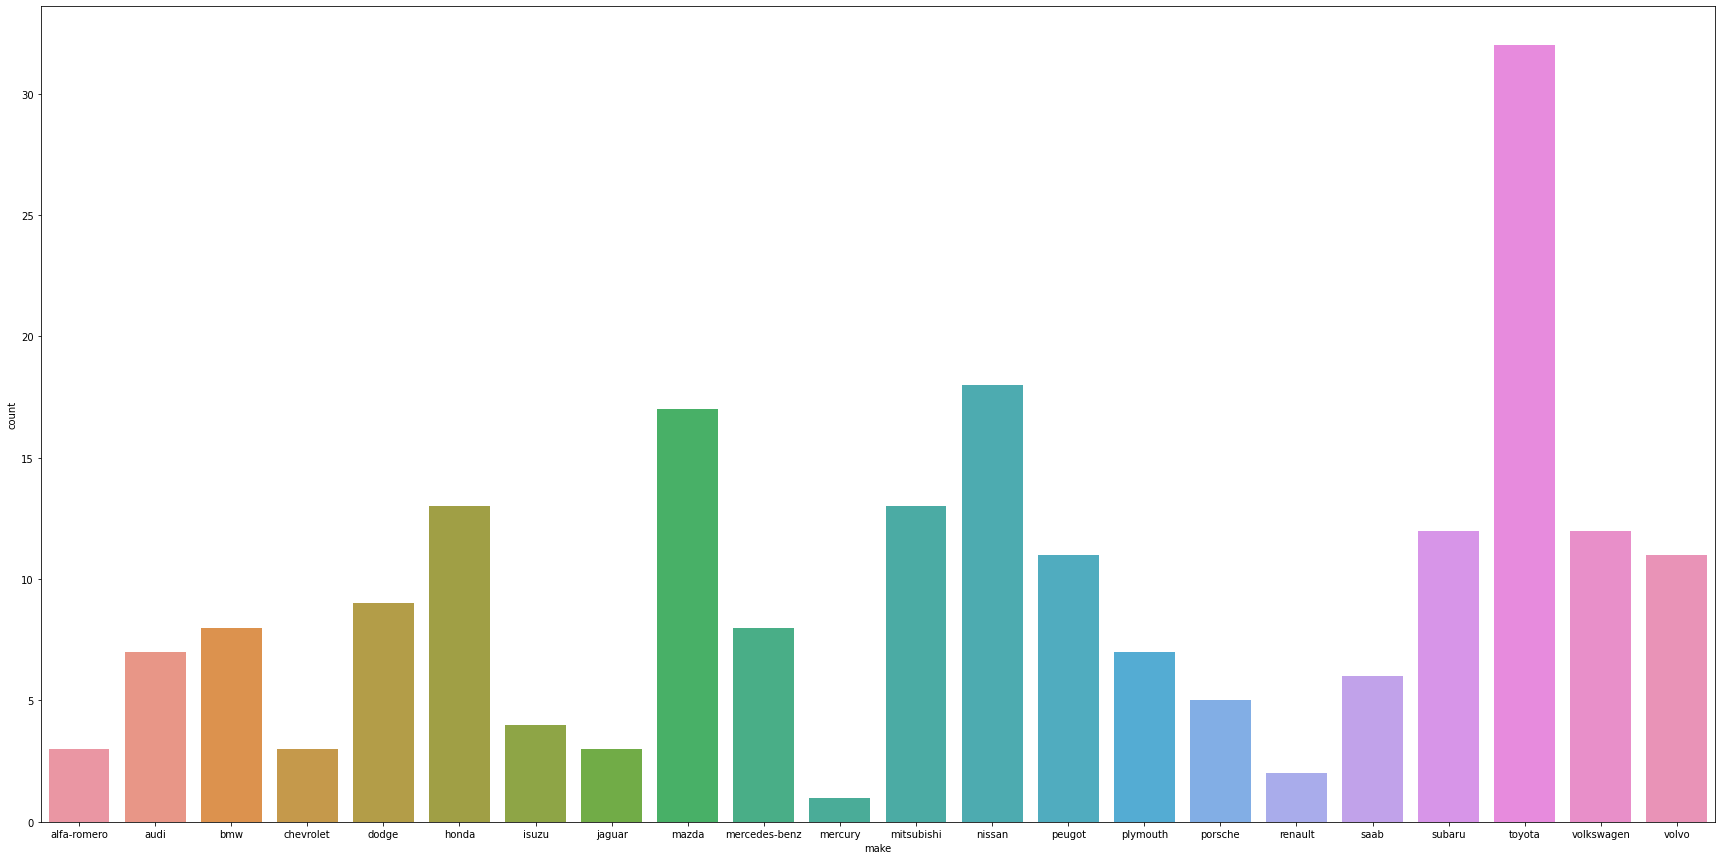

In [18]:
plt.figure(figsize=(30,15))
sns.countplot(x="make",data=auto)

<h1>COLUMN 4 - FUEL TYPE(Discrete)</h1>

In [19]:
auto.f_type.describe()

count     205
unique      2
top       gas
freq      185
Name: f_type, dtype: object

In [20]:
auto.f_type.value_counts()

gas       185
diesel     20
Name: f_type, dtype: int64

<AxesSubplot:xlabel='f_type', ylabel='count'>

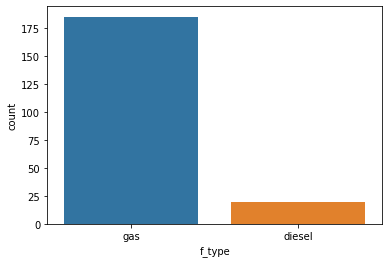

In [21]:
sns.countplot(x="f_type",data=auto)

<h1>COLUMN 5- ASPIRATION (Discrete)</h1>

In [22]:
auto.aspr.describe()

count     205
unique      2
top       std
freq      168
Name: aspr, dtype: object

In [23]:
auto.aspr.value_counts()

std      168
turbo     37
Name: aspr, dtype: int64

<AxesSubplot:xlabel='aspr', ylabel='count'>

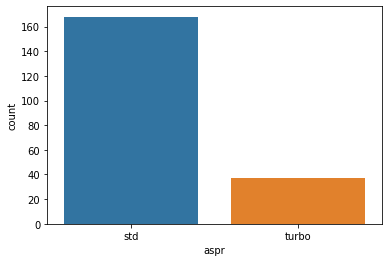

In [24]:
sns.countplot(x="aspr",data=auto)

<h1>COLUMN 6 - NUMBER OF DOORS (Discrete)</h1>

In [25]:
auto.no_doors.value_counts()

four    114
two      89
Name: no_doors, dtype: int64

In [26]:
auto.no_doors.describe()

count      203
unique       2
top       four
freq       114
Name: no_doors, dtype: object

In [27]:
auto.no_doors.isnull().sum()

2

<h3> It has null attributes, so replacing the null values with its mode.</h3>

In [28]:
auto.no_doors.fillna(auto.no_doors.mode(),inplace=True)

In [29]:
auto.no_doors.isnull().sum()

2

In [30]:
auto.no_doors.describe()

count      203
unique       2
top       four
freq       114
Name: no_doors, dtype: object

<AxesSubplot:xlabel='no_doors', ylabel='count'>

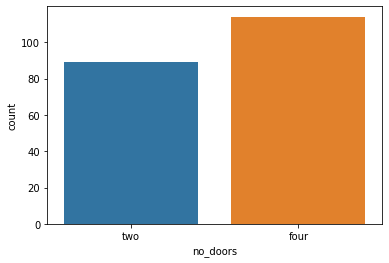

In [31]:
sns.countplot(x="no_doors",data=auto)

<h1>COLUMN 7- BODY STYLE(Discrete)</h1>

In [32]:
auto.b_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: b_style, dtype: int64

In [33]:
auto.b_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: b_style, dtype: object

<AxesSubplot:xlabel='b_style', ylabel='count'>

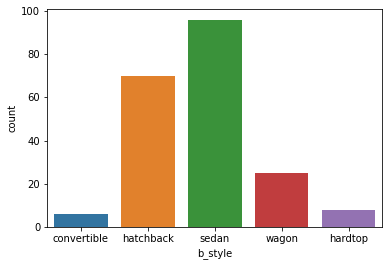

In [34]:
sns.countplot(x="b_style",data=auto)

<h1>COLUMN 8 -DRIVE WHEELS(Discrete)</h1>

In [35]:
auto.wheel.describe()

count     205
unique      3
top       fwd
freq      120
Name: wheel, dtype: object

In [36]:
auto.wheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: wheel, dtype: int64

<AxesSubplot:xlabel='wheel', ylabel='count'>

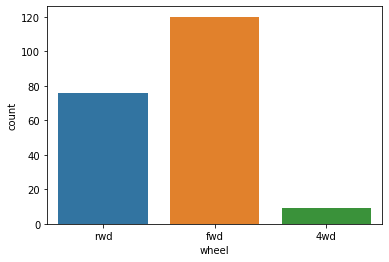

In [37]:
sns.countplot(x="wheel",data=auto)

<h1>COLUMN 9 -ENGINE LOCATION(Discrete)</h1>

In [38]:
auto.eng_loc.describe()

count       205
unique        2
top       front
freq        202
Name: eng_loc, dtype: object

In [39]:
auto.eng_loc.value_counts()

front    202
rear       3
Name: eng_loc, dtype: int64

<AxesSubplot:xlabel='eng_loc', ylabel='count'>

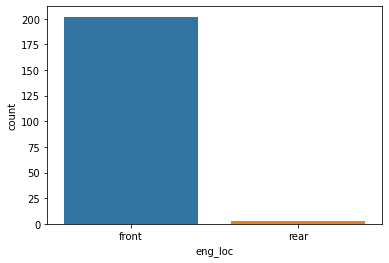

In [40]:
sns.countplot(x="eng_loc",data=auto)

<h1>COLUMN 10- WHEEL BASE (Continuous)</h1>

In [41]:
auto.w_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: w_base, dtype: float64

<AxesSubplot:>

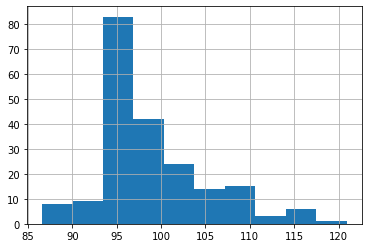

In [42]:
auto.w_base.hist()

In [43]:
stats.shapiro(auto.w_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

<h3>It is not normally distributed and it has outliers </h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc7af5e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc7b055e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc7af5ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc7b05d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7b100d0>],
 'means': []}

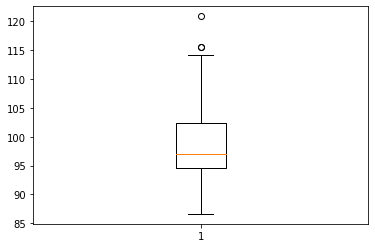

In [44]:
plt.boxplot(auto.w_base)

<h1>COLUMN 11 - LENGTH (Continuous)</h1>

In [45]:
auto.len.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: len, dtype: float64

<AxesSubplot:>

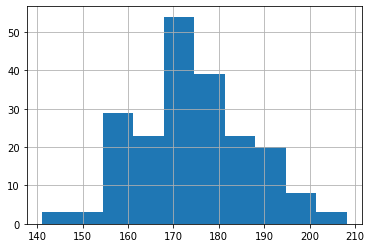

In [46]:
auto.len.hist()

In [47]:
stats.shapiro(auto.len)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

<h3>It is not normally distributed and it has outliers </h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc7bef520>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc7befc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc7bef160>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc7bfa3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7bfa730>],
 'means': []}

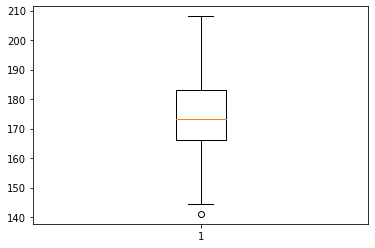

In [48]:
plt.boxplot(auto.len)

<h1>COLUMN 12 - WIDTH (Continuous)</h1>

In [49]:
auto.wid.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: wid, dtype: float64

<AxesSubplot:>

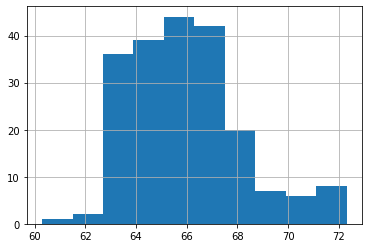

In [50]:
auto.wid.hist()

In [51]:
stats.shapiro(auto.wid)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

<h3>It is not normally distributed and it has outliers </h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc7cd4df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc7ce2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc7cd4a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc7ce2c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7cef040>],
 'means': []}

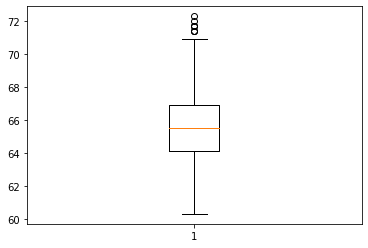

In [52]:
plt.boxplot(auto.wid)

<h1>COLUMN 13 - HEIGHT(Continuous)</h1>

In [53]:
auto.ht.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: ht, dtype: float64

<AxesSubplot:>

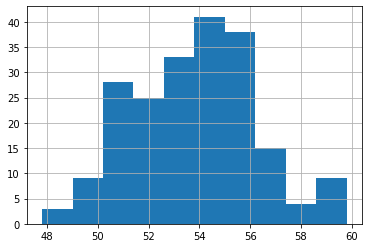

In [54]:
auto.ht.hist()

In [55]:
stats.shapiro(auto.ht)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

<h3>It is not normally distributed.</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc7dc9b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc7dd9280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc7dc97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc7dd99a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7dd9d30>],
 'means': []}

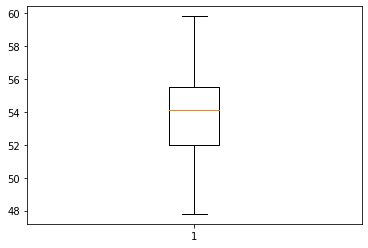

In [56]:
plt.boxplot(auto.ht)

<h1>COLUMN 14 - CURB WEIGHT(Continuous)</h1>

In [57]:
auto.c_wht.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: c_wht, dtype: float64

<AxesSubplot:>

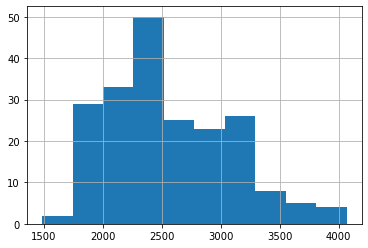

In [58]:
auto.c_wht.hist()

In [59]:
stats.shapiro(auto.c_wht)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

<h3>It is not normally distributed.</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc7ebb100>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc7ebb820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc7eacd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc7ebbf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc7ec6310>],
 'means': []}

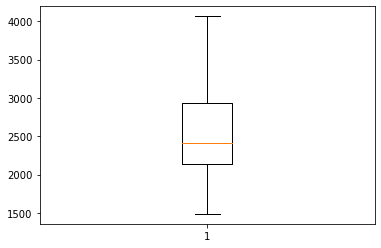

In [60]:
plt.boxplot(auto.c_wht)

<h1>COLUMN 15 - ENGINE TYPE (Discrete)</h1>

In [61]:
auto.e_type.describe()

count     205
unique      7
top       ohc
freq      148
Name: e_type, dtype: object

In [62]:
auto.e_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: e_type, dtype: int64

<AxesSubplot:xlabel='e_type', ylabel='count'>

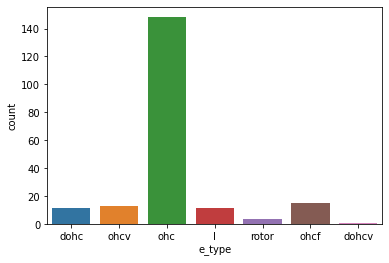

In [63]:
sns.countplot(x="e_type",data=auto)

<h1>COLUMN 16 - NUMBER OF CYLINDERS(Discrete)</h1>

In [64]:
auto.n_cylin.describe()

count      205
unique       7
top       four
freq       159
Name: n_cylin, dtype: object

In [65]:
auto.n_cylin.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: n_cylin, dtype: int64

<AxesSubplot:xlabel='n_cylin', ylabel='count'>

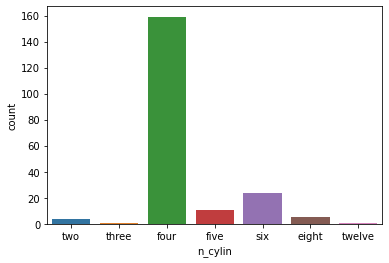

In [66]:
sns.countplot(x="n_cylin",data=auto,order=["two","three","four","five","six","eight","twelve"])

<h4>Combining values</h4>

In [67]:
auto.n_cylin=auto.n_cylin.replace(["two","three","four"],"four and below")
auto.n_cylin=auto.n_cylin.replace(["five","six","eight","twelve"],"five and above")

<AxesSubplot:xlabel='n_cylin', ylabel='count'>

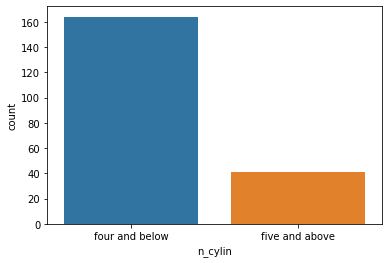

In [68]:
sns.countplot(x="n_cylin",data=auto)

<h1>COLUMN 17 - ENGINE SIZE(Continuous)</h1>

In [69]:
auto.e_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: e_size, dtype: float64

<AxesSubplot:>

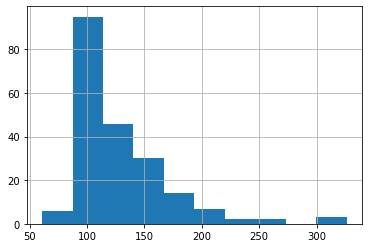

In [70]:
auto.e_size.hist()

In [71]:
stats.shapiro(auto.e_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

<h3>It is not normally distributed and it has outliers.</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc80ccac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc80d7220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc80cc730>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc80d7940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc80d7cd0>],
 'means': []}

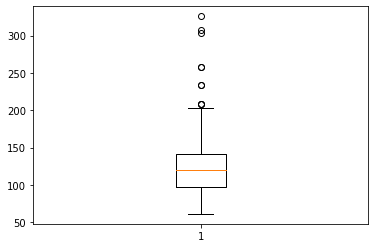

In [72]:
plt.boxplot(auto.e_size)

<h1>COLUMN 18 - FUEL SYSTEM(Discrete)</h1>

In [73]:
auto.fuel_sys.describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel_sys, dtype: object

In [74]:
auto.fuel_sys.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_sys, dtype: int64

<AxesSubplot:xlabel='fuel_sys', ylabel='count'>

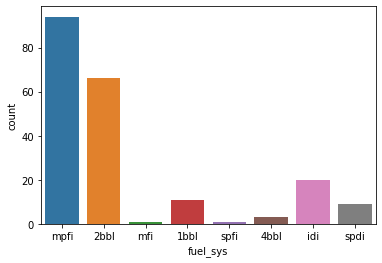

In [75]:
sns.countplot(x="fuel_sys",data=auto)

<h1>COLUMN 19 - BORE(Continuous)</h1>

In [76]:
auto.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

<AxesSubplot:>

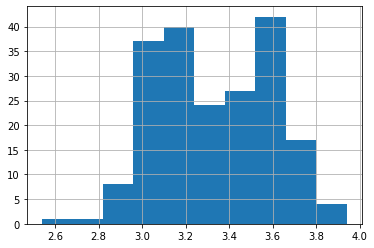

In [77]:
auto.bore.hist()

<h3> -------------------------------------------------------<br>* Bore has 4 null attributes.<br>* Filling the null values with their median</h3>
<h3>Bore is not normally distributed  </h3>

In [78]:
auto.bore.fillna(auto.bore.mean(),inplace=True)

In [79]:
auto.bore.isnull().sum()

0

In [80]:
stats.shapiro(auto.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc97ff0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc97ff7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc97efca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc97ffee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc980a2b0>],
 'means': []}

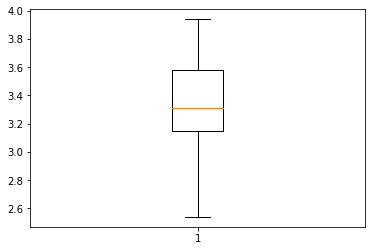

In [81]:
plt.boxplot(auto.bore)

<h1>COLUMN 20 - STROKE(Continuous)</h1>

In [82]:
auto.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

<AxesSubplot:>

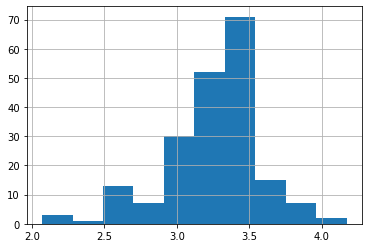

In [83]:
auto.stroke.hist()

<h3>Stroke is not normally distributed and it has outliers</h3><br><h3> -------------------------------------------------------<br>* Stroke has 4 null attributes.<br>* Filling the null values with their median</h3>

In [84]:
auto.stroke.fillna(auto.stroke.median(),inplace=True)

In [85]:
auto.stroke.isnull().sum()

0

In [86]:
stats.shapiro(auto.stroke)

ShapiroResult(statistic=0.9372692704200745, pvalue=9.892903563013533e-08)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc98ea5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc98eacd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc98ea220>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc98f3430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc98f37c0>],
 'means': []}

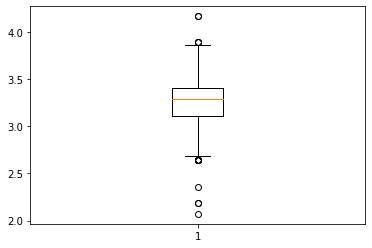

In [87]:
plt.boxplot(auto.stroke)

<h1>COLUMN 21 - COMPRESSION RATIO(Continuous)</h1>

In [88]:
auto.cmp.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: cmp, dtype: float64

<AxesSubplot:>

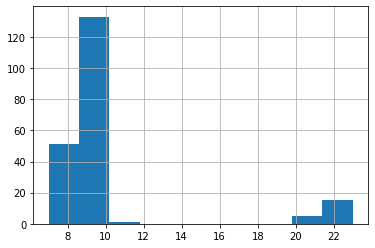

In [89]:
auto.cmp.hist()

In [90]:
stats.shapiro(auto.cmp)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

<h3>It is not normally distributed  and it has outliers </h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc99cdb80>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc99dc2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc99cd7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc99dca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc99dcd90>],
 'means': []}

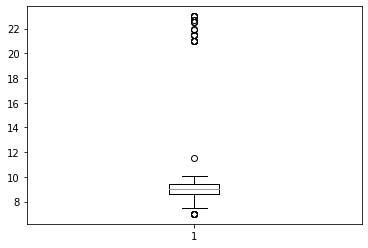

In [91]:
plt.boxplot(auto.cmp)

<h1>COLUMN 22 - HORSE POWER(Continuous)</h1>

In [92]:
auto.hpow.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: hpow, dtype: float64

<AxesSubplot:>

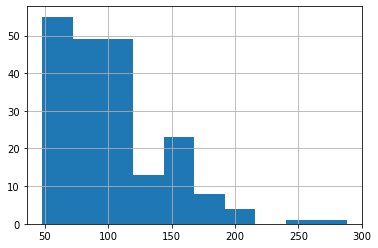

In [93]:
auto.hpow.hist()

<h3>It is not normally distributed and it has outliers</h3><br><h3> -------------------------------------------------------<br>* It has 2 null attributes.<br>* Filling the null values with their median</h3>

In [94]:
auto.hpow.fillna(auto.hpow.median(),inplace=True)

In [95]:
auto.hpow.isnull().sum()

0

In [96]:
stats.shapiro(auto.hpow)

ShapiroResult(statistic=0.8840506672859192, pvalue=1.8387607408909545e-11)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc9abf130>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc9abf880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc9aafd60>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc9abffa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc9aca370>],
 'means': []}

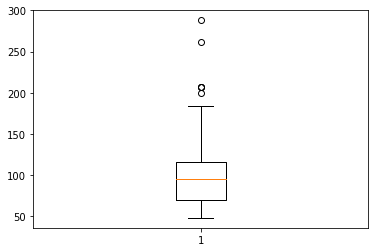

In [97]:
plt.boxplot(auto.hpow)

<h1>COLUMN 23 - PEAK RPM(Continuous)</h1>

In [98]:
auto.rmp.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: rmp, dtype: float64

<AxesSubplot:>

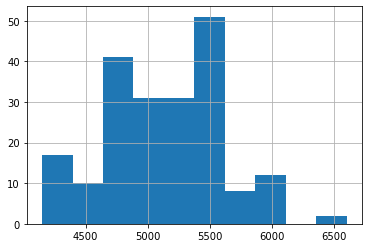

In [99]:
auto.rmp.hist()

<h3>It is not normally distributed and it has outliers</h3><br><h3> -------------------------------------------------------<br>* It has 2 null attributes.<br>* Filling the null values with their median</h3>

In [100]:
auto.rmp.fillna(auto.rmp.median(),inplace=True)

In [101]:
auto.rmp.isnull().sum()

0

In [102]:
stats.shapiro(auto.rmp)

ShapiroResult(statistic=0.9701935648918152, pvalue=0.00024416492669843137)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc9b9b490>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc9b9bbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc9b9b100>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc9ba6310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc9ba66a0>],
 'means': []}

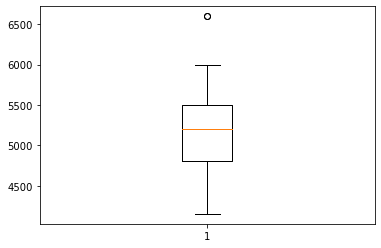

In [103]:
plt.boxplot(auto.rmp)

<h1>COLUMN 24 - CITY MPG(Continuous)</h1>

In [104]:
auto.c_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: c_mpg, dtype: float64

<AxesSubplot:>

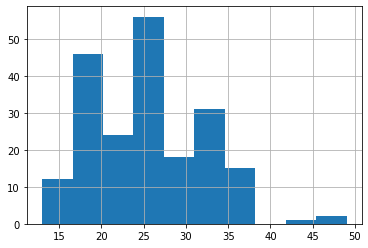

In [105]:
auto.c_mpg.hist()

In [106]:
stats.shapiro(auto.c_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

<h3>It is not normally distributed and it has outliers</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc9c836d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc9c83df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc9c83340>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc9c90550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc9c908e0>],
 'means': []}

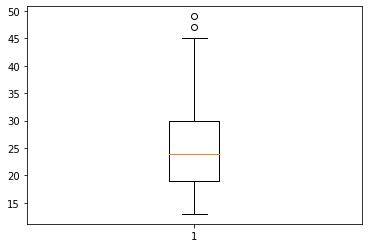

In [107]:
plt.boxplot(auto.c_mpg)

<h1>COLUMN 25 - HIGHWAY MPG(Continuous)</h1>

In [108]:
auto.h_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: h_mpg, dtype: float64

<AxesSubplot:>

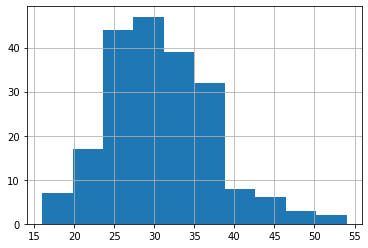

In [109]:
auto.h_mpg.hist()

In [110]:
stats.shapiro(auto.h_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

<h3>It is not normally distributed and it has outliers</h3>

In [111]:
Q1=auto.h_mpg.quantile(0.25)
Q3=auto.h_mpg.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)


25.0 34.0 9.0 47.5 11.5


In [112]:
auto[(auto.h_mpg>LE) & (auto.h_mpg<UE)]

,symbol,nor_loss,make,f_type,aspr,no_doors,b_style,wheel,eng_loc,w_base,...,e_size,fuel_sys,bore,stroke,cmp,hpow,rmp,c_mpg,h_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,>=-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,>=-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,>=-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,>=-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [113]:
#capping
auto.h_mpg[auto.h_mpg>UE]=UE
auto.h_mpg[auto.h_mpg<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_16404/3910588947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto.h_mpg[auto.h_mpg>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_16404/3910588947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto.h_mpg[auto.h_mpg<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1abc9d63820>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc9d63f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc9d63490>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc9d706d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc9d70a60>],
 'means': []}

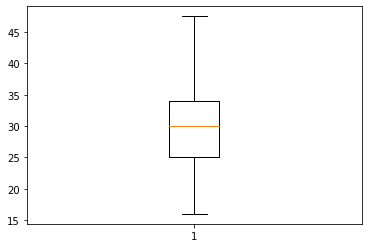

In [114]:
plt.boxplot(auto.h_mpg)

In [115]:
auto.h_mpg.shape

(205,)

<h1>COLUMN 26 - PRICE(Continuous)</h1>

In [116]:
auto.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:>

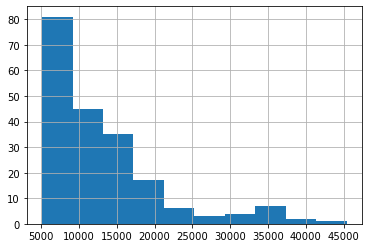

In [117]:
auto.price.hist()

In [118]:
auto.price.fillna(inplace=True)

In [119]:
auto.price.isnull().sum()

0

<h3>It is not normally distributed and it has outliers</h3><br><h3> -------------------------------------------------------<br>* It has 4 null attributes.<br>* Filling the null values with their median</h3>

In [120]:
stats.shapiro(auto.price)

ShapiroResult(statistic=0.800327479839325, pvalue=3.161288318929501e-15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1abc9e663a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abc9e66ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abc9e55fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1abc9e70220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abc9e705b0>],
 'means': []}

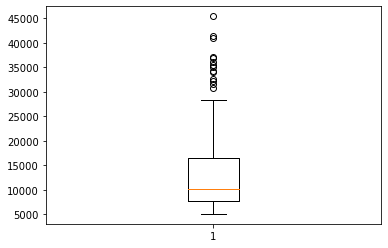

In [121]:
plt.boxplot(auto.price)

In [122]:
auto.shape

(199, 26)

<h2> Performing Hypothesis Test for Symboling and Price</h2>

<h3>STEPS:<br>
1.x=Symboling(discrete) and y=price(continuous)<br>
    
2. C.I=95% and alpha=0.05<br>
    
3.Test choosen= F_oneway ANOVA<br>
    
4.Framing hypothesis:<br>
    H0=> mean(-1)=mean(0)=mean(1)=mean(2)=mean(3)<br>
    
    H1=> mean(-1)!=mean(0)!=mean(1)!=mean(2)!=mean(3)<br>
    
5.Perform test</h3>

In [123]:
lesser_equal_neg_one=auto.price[auto.symbol==">=-1"]
zero=auto.price[auto.symbol==0]
one=auto.price[auto.symbol==1]
two=auto.price[auto.symbol==2]
three=auto.price[auto.symbol==3]

In [124]:
from  scipy.stats import f_oneway  # one way ANOVA
f_oneway(lesser_equal_neg_one,zero,one,two,three)

F_onewayResult(statistic=8.433813868999867, pvalue=2.708172730112253e-06)

<h3>6.pvalue=0.000<br>
    
7.p is lesser than alpha<br>
    
8.null hypothesis is rejected<br>
    
9.We conclude that symboling does not affect the price of the car</h3>

<h2>Performing Multi Linear Regression</h2><br>

<h3>1.Drop the discrete columns <br>
    
2.Perform pearson r and find the correlation between the variables
   y=price and x= continuous datas</h3>

In [125]:
#nomalized losses and price
stats.pearsonr(auto.nor_loss,auto.price)

(0.09688627470983717, 0.1734050294560938)

In [126]:
#wheel base and price
stats.pearsonr(auto.w_base,auto.price)

(0.583841669953256, 1.420096084799232e-19)

In [127]:
#length and price
stats.pearsonr(auto.len,auto.price)

(0.6912065018980801, 1.323962094671528e-29)

In [128]:
stats.pearsonr(auto.wid,auto.price)

(0.751628108086593, 1.8754545226142642e-37)

In [129]:
stats.pearsonr(auto.ht,auto.price)

(0.1336387806975614, 0.059865831554287235)

In [130]:
stats.pearsonr(auto.c_wht,auto.price)

(0.8340594476291079, 8.781207356676491e-53)

In [131]:
stats.pearsonr(auto.e_size,auto.price)

(0.8721521999503734, 4.443948756998532e-63)

In [132]:
stats.pearsonr(auto.bore,auto.price)

(0.5425644274024172, 1.256276884088304e-16)

In [133]:
stats.pearsonr(auto.stroke,auto.price)

(0.08425617138590913, 0.23673104466637607)

In [134]:
stats.pearsonr(auto.cmp,auto.price)

(0.07609485152895838, 0.28541349097348756)

In [135]:
stats.pearsonr(auto.hpow,auto.price)

(0.8119279313785578, 6.185027568551035e-48)

In [136]:
stats.pearsonr(auto.rmp,auto.price)

(-0.10198613083601528, 0.1517526128933546)

In [137]:
stats.pearsonr(auto.c_mpg,auto.price)

(-0.6902623876759875, 1.694964947834805e-29)

In [138]:
stats.pearsonr(auto.h_mpg,auto.price)

(-0.7212333609459113, 3.0235980373993126e-33)

<h3>Here,
    horsepower,engine size,curb weight, and width has positive medium corrln<br>
    whereas other variables have weak correlation with price</h3>

In [139]:
X=auto[['hpow','c_wht','e_size','wid']]
Y=auto.price

In [140]:
train_x=X.iloc[:162]
train_y=Y.iloc[:162]
train_xcon=sm.add_constant(train_x)

test_x=X.iloc[162: ]
test_y=Y.iloc[162: ]
test_xcon=sm.add_constant(test_x)

C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [141]:
model=sm.OLS(train_y,train_xcon).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     201.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           9.59e-61
Time:                        11:21:08   Log-Likelihood:                -1550.3
No. Observations:                 162   AIC:                             3111.
Df Residuals:                     157   BIC:                             3126.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.697e+04   1.47e+04     -3.196      0.002    -7.6e+04   -1.79e+04
hpow          64.6261     13.098      4.934      0.000      38.754      90.498
c_wht          1.6934      1.368      1.238      0.218      -1.009       4.396
e_size        84.0379     14.218      5.911      0.000      55.954     112.121
wid          588.6418    257.971      2.282      0.024      79.100    1098.183
==============================================================================
Omnibus:                       11.432   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               24.178
Skew:                           0.224   Prob(JB):                     5.62e-06
Kurtosis:                       4.839   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
predicted_test_y=model.predict(test_xcon)